<a href="https://colab.research.google.com/github/AdrianMartinezRivas/To-classify-non-malignant-RWPE-1-and-cancerous-PC3-GFP-prostate-cell-lines-from-7-features/blob/main/Paper_Ophelie_version_finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Libraries and modules
import numpy as np
import random
import sympy
import pandas as pd
import seaborn as sns
# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')
path =""

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/FilesforDL/paperOphelie/TrainBasefinal.csv')
df

,&Slope_Ext,Youngs_Module,ResidualRMS,Slope_Ret,Adhesion,Minimum_Position,Area,Classes
0,0.003094,678.440,3.420000e-11,0.007026,1.280000e-10,3.550000e-07,6.120000e-17,0
1,0.002638,590.109,2.560000e-11,0.006350,6.360000e-11,2.430000e-07,3.030000e-17,0
2,0.002743,700.154,1.320000e-11,0.006584,1.020000e-10,2.640000e-07,1.080000e-16,0
3,0.002522,559.716,2.720000e-11,0.006425,1.110000e-10,2.560000e-07,7.920000e-17,0
4,0.002509,488.270,3.230000e-11,0.006341,7.630000e-11,2.850000e-07,6.560000e-17,0
...,...,...,...,...,...,...,...,...
3194,0.002926,871.283,1.850000e-11,0.005896,1.390000e-10,2.600000e-07,8.840000e-17,1
3195,0.003417,405.045,5.970000e-11,0.006790,1.430000e-11,4.430000e-07,1.210000e-17,1
3196,0.000603,260.194,8.840000e-11,0.005340,2.360000e-11,1.930000e-07,1.030000e-17,1
3197,0.001790,319.269,4.670000e-11,0.005240,1.940000e-11,3.100000e-07,1.540000e-17,1


## In the last dataframe the class 0 corresponds to PC3 and the class 1 corresponds to RWPE-1

In [4]:
# Seeing the column names:

df.columns

Index(['&Slope_Ext', 'Youngs_Module', 'ResidualRMS', 'Slope_Ret', 'Adhesion',
       'Minimum_Position', 'Area', 'Classes'],
      dtype='object')

Distribution of the Classes in the subsample dataset
Classes
1    0.500156
0    0.499844
Name: count, dtype: float64


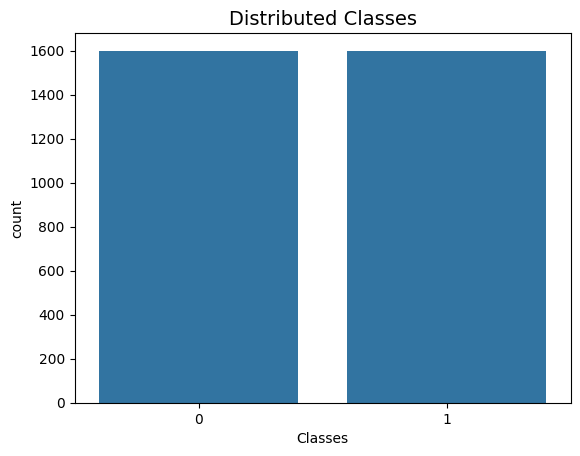

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Distribution of the Classes in the subsample dataset')
print(df['Classes'].value_counts() / len(df))

sns.countplot(x='Classes', data=df)
plt.title('Distributed Classes', fontsize=14)
plt.show()


The 2 classes are almost equally distributed, with class 0 (PC3) accounting for 49.98 % and class 1 (RWPE-1) for 50.01 %.







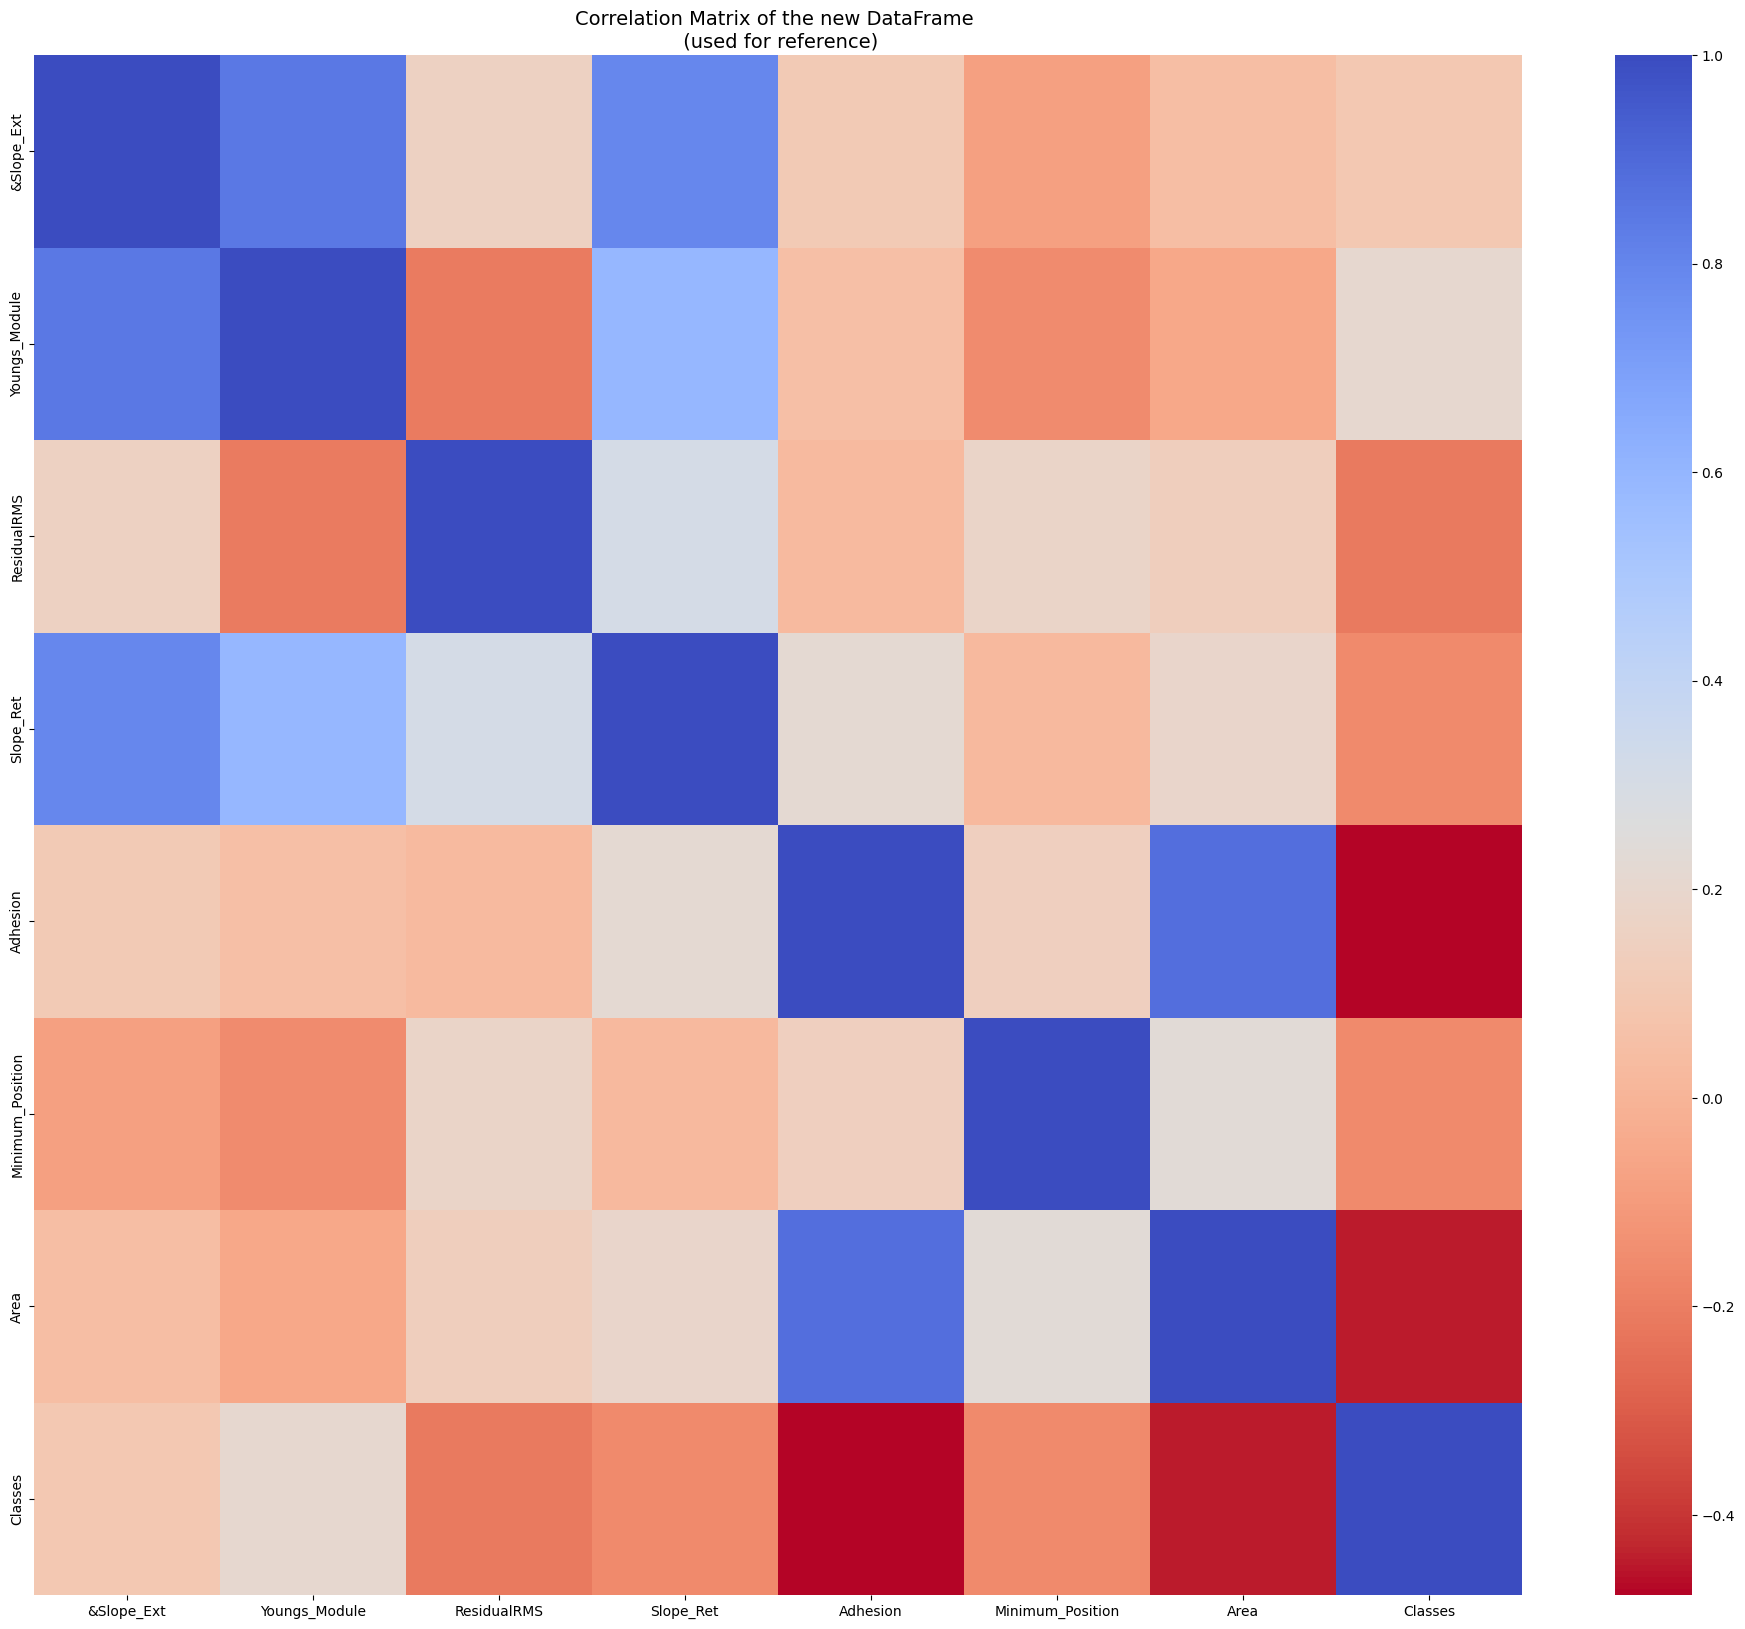

In [6]:
#let's look at the correlations of the seven features:

f, ax2 = plt.subplots(1, 1, figsize=(24, 20))
sub_sample_corr = df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size': 20}, ax=ax2)
ax2.set_title("Correlation Matrix of the new DataFrame \n (used for reference)", fontsize=14)
plt.show()


Area and adhesion are correlated, also &Slope_Ext', 'Youngs_Module' are correlated, so we can remove one of each correlated and it would give also good results this ML (to test)

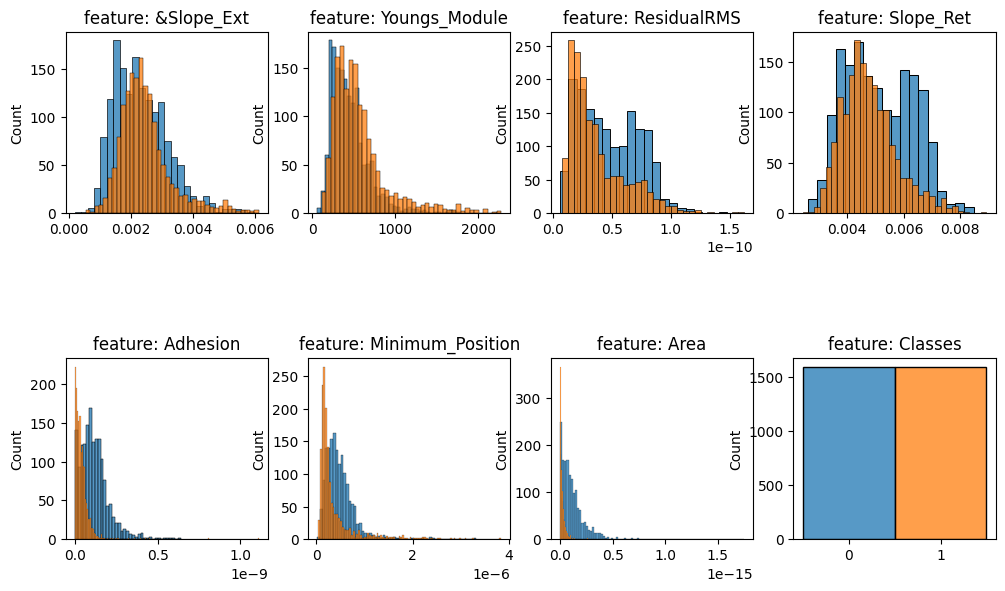

In [7]:
# Script to represent graphically all the features
features = df #.drop("Class", axis=1)

plt.figure(figsize=(12,32))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)
for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(df[f][df["Classes"] == 0])
    sns.histplot(df[f][df["Classes"] == 1])
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))
plt.show()

In [8]:
# Sacaling the dataframe
X = df.drop('Classes', axis=1)
y = df['Classes']

In [9]:
# Data already scaled, test sets have to be split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [11]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

import xgboost as xgb
models['XGBoost']=xgb.XGBClassifier()

from sklearn.ensemble import AdaBoostClassifier
models['ADA']=AdaBoostClassifier()

from sklearn.ensemble import HistGradientBoostingRegressor
#models['HistGradientBoostingRegressor']=HistGradientBoostingRegressor()

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score


accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier
    models[key].fit(X_train, y_train)

    # Make predictions
    predictions = models[key].predict(X_test)

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.789062,0.877966,0.723464
Support Vector Machines,0.787500,0.861017,0.727794
Decision Trees,0.760938,0.738983,0.741497
Random Forest,0.845313,0.894915,0.795181
Naive Bayes,0.737500,0.949153,0.646651
K-Nearest Neighbor,0.839063,0.898305,0.784024
XGBoost,0.840625,0.850847,0.812298
ADA,0.814063,0.864407,0.763473


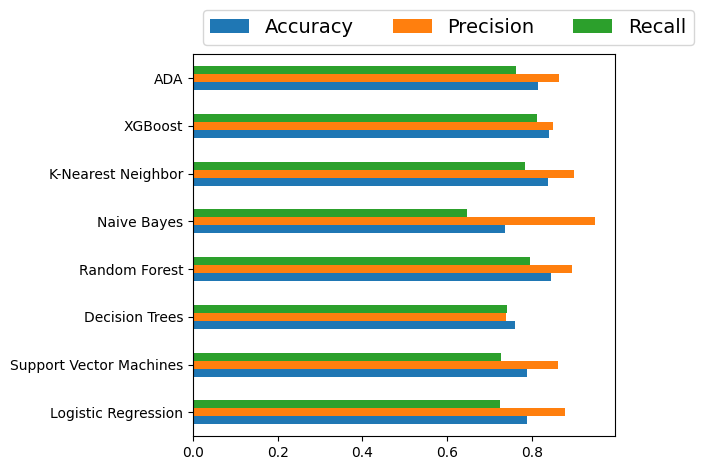

In [14]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()),
    bbox_to_anchor=(0, 1),
    loc='lower left',
    prop={'size': 14}
)
plt.tight_layout()

In [15]:
# testing with xgb.XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
xgb=xgb.XGBClassifier(max_depth=2, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [16]:
y_pred=xgb.predict(X_test)
y_pred
a = pd.DataFrame(y_pred)
print(a.value_counts())

1    321
0    319
Name: count, dtype: int64


Accuracy: 0.837500
Precision: 0.797508
Recall: 0.867797
F1 score: 0.831169
ROC AUC: 0.839695
Confusion Matrix:
 [[280  65]
 [ 39 256]]


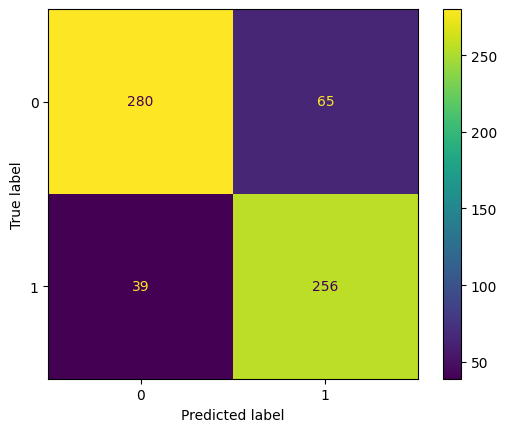

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
import matplotlib.pyplot as plt
# Falta terminar
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' %accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred,labels=xgb.classes_)
print('Confusion Matrix:\n', matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=xgb.classes_)
disp.plot()
plt.show()

###Prediction on new PC3 data:

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load  original dataset
X = df.drop('Classes', axis=1)
y = df['Classes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler and fit/transform on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform testing data using the fitted scaler from training data
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost model
xgb = XGBClassifier(max_depth=2, random_state=42)

# Fit the model on scaled training data
xgb.fit(X_train_scaled, y_train)

# Make predictions on scaled test data
predictions = xgb.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on test set: {accuracy:.2f}")

# Now, predict on new data PC3
PC3 = pd.read_csv('/content/drive/MyDrive/FilesforDL/paperOphelie/PC3_Test144cellules.csv')
PC3_array = scaler.transform(PC3)  # Transform PC3 data using the same scaler

# Make predictions on new data
predictions_new_data = xgb.predict(PC3_array)

# Print predictions and their counts
b = pd.DataFrame(predictions_new_data, columns=['Predicted_Class'])
print(f"Predictions for new data:\n{b['Predicted_Class'].value_counts()}")


Accuracy on test set: 0.86
Predictions for new data:
Predicted_Class
0    1947
1     357
Name: count, dtype: int64


In [32]:
# Given predictions count
predicted_counts = pd.Series([1947, 357], index=[0, 1])

# Calculate total predictions
total_predictions = predicted_counts.sum()

# Calculate proportions (confidence)
proportions = predicted_counts / total_predictions

# Display confidence levels
print(f"Confidence for class 0: {proportions[0]*100:.2f}%")
print(f"Confidence for class 1: {proportions[1]*100:.2f}%")


Confidence for class 0: 84.51%
Confidence for class 1: 15.49%


## The model is predicting  with a confidence in new data of 84.51%

Prediction on new RWPE1 data:

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load your RWPE1 new data
RWPE1 = pd.read_csv('/content/drive/MyDrive/FilesforDL/paperOphelie/RWPE1_Test144cellules.csv')

# Separate features (X) from the RWPE1 data
RWPE1_array = RWPE1.to_numpy()

# Transform RWPE1 data using the previously fitted scaler
RWPE1_array_scaled = scaler.transform(RWPE1_array)

# Make predictions on RWPE1 data using the trained XGBoost model
predictions_RWPE1 = xgb.predict(RWPE1_array_scaled)

# Print predictions and their counts
b_RWPE1 = pd.DataFrame(predictions_RWPE1, columns=['Predicted_Class'])
print(f"Predictions for RWPE1 new data:\n{b_RWPE1['Predicted_Class'].value_counts()}")


Predictions for RWPE1 new data:
Predicted_Class
1    1748
0     556
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
# Given predictions count
predicted_counts = pd.Series([1748, 556], index=[0, 1])

# Calculate total predictions
total_predictions = predicted_counts.sum()

# Calculate proportions (confidence)
proportions = predicted_counts / total_predictions

# Display confidence levels
print(f"Confidence for class 0: {proportions[0]*100:.2f}%")
print(f"Confidence for class 1: {proportions[1]*100:.2f}%")


Confidence for class 0: 75.87%
Confidence for class 1: 24.13%
